In [1]:
#import dependencies

import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import gmaps
from config import gkey

gmaps.configure(gkey)


In [2]:
#import census data csv for dallas county
census = pd.read_csv("Resources/DallasCensusData.csv")

#import hospital data csv for dallas county
hospitals = pd.read_csv("Resources/HospitalLatLong.csv")

#import Clinic Zips
clinics_zips=pd.read_csv("Resources/ClinicMasterZips.csv")

#import urgent care csv file for dallas county
clinics = pd.read_csv("Resources/ClinicMasterComplete.csv")


In [3]:
#loop through census data to obtain lat and lng for each zipcode
zip_codes = ["75001","75006","75019","75038","75039","75040","75041","75042","75043","75044","75048","75050","75051","75052","75054","75060","75061","75062","75063","75080","75081","75082","75088","75089","75104","75115","75116","75134","75137","75141","75146","75149","75150","75159","75172","75180","75181","75182","75201","75202","75203","75204","75205","75206","75207","75208","75209","75210","75211","75212","75214","75215","75216","75217","75218","75219","75220","75223","75224","75225","75226","75227","75228","75229","75230","75231","75232","75233","75234","75235","75236","75237","75238","75240","75241","75243","75244","75246","75247","75248","75249","75251","75253","75254","75270","75390"]
zip_code_details = []
def get_coordinates_per_zipcode(zip_code):
    target_county = zip_code
    # Build the endpoint URL
    target_url = ('https://maps.googleapis.com/maps/api/geocode/json?'
        'address={0}&key={1}').format(target_county, gkey)
    data = requests.get(target_url).json()
    return data
for zip_code in zip_codes:
    data = get_coordinates_per_zipcode(zip_code)
    code = int(data["results"][0]["address_components"][0]["long_name"])
    lat = data["results"][0]["geometry"]["location"]["lat"]
    lng = data["results"][0]["geometry"]["location"]["lng"]
    zip_code_details.append({"zip_code": code, "lat": lat, "lng":lng})

In [4]:
#create dataframe of the lat and lng of the census data zipcodes
zips_df = pd.DataFrame(zip_code_details, columns = ["zip_code","lat","lng"])
zips_df.head()

,zip_code,lat,lng
0,75001,32.965478,-96.829740
1,75006,32.967845,-96.888720
2,75019,32.961876,-96.996092
3,75038,32.872152,-96.996092
4,75039,32.891677,-96.947753


In [5]:
#merge original census file with new zip_df to include lat and lng
zip_merge = pd.merge(census,zips_df,left_on='Zipcode', right_on='zip_code', how='inner')

#drop NaN values
dropped_data = zip_merge.dropna(how="any")

dropped_data.head()

,Zipcode,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,Unemployment Count,City,zip_code,lat,lng
0,75001,13214.0,32.2,57633.0,43919.0,1722.0,13.031633,433.0,Addison,75001,32.965478,-96.829740
1,75006,47590.0,34.8,56985.0,27010.0,6927.0,14.555579,1996.0,Carrollton,75006,32.967845,-96.888720
2,75019,39551.0,37.9,110445.0,48040.0,1624.0,4.106091,985.0,Coppell,75019,32.961876,-96.996092
3,75038,28161.0,30.0,48130.0,28391.0,4581.0,16.267178,1512.0,Irving,75038,32.872152,-96.996092
4,75039,12197.0,32.2,73503.0,65135.0,819.0,6.714766,264.0,Irving,75039,32.891677,-96.947753


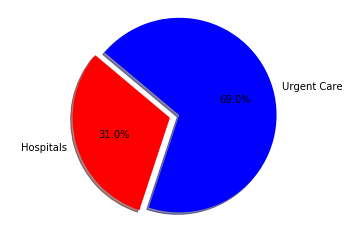

In [6]:
# Labels for the sections of our pie chart
labels = ["Hospitals", "Urgent Care"]

# The values of each section of the pie chart
sizes = [27, 60]

# The colors of each section of the pie chart
colors = ["red", "blue"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0.1, 0)

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)


# Tells matplotlib that we want a pie chart with equal axes
plt.axis("equal")

plt.savefig("images/PieChart.png")

In [7]:
#Map hospitals in dallas county
hospital_loc = hospitals[["lat","lng"]]
hospital_name = hospitals["Hospital Name"]
hospital_layer = gmaps.symbol_layer(
   hospital_loc,hospital_name, fill_color='red', stroke_color='red', scale=3)
fig = gmaps.figure()
fig.add_layer(hospital_layer)
fig



Figure(layout=FigureLayout(height='420px'))

![Dallas County Hospital Map](images/HospitalMap.png)

In [8]:
#Map Urgent Cares in Dallas County
#Urgent Care CSV
uc_clinic = clinics[["Lat","Lng"]]

# HINT: be sure to handle NaN values
care_name = clinics["Urgent_Care"]
clinic_layer = gmaps.symbol_layer(
   uc_clinic, care_name, fill_color='blue', stroke_color='blue', scale=3)
fig = gmaps.figure()
fig.add_layer(clinic_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [17]:
![Dallas County Clinics Map](images/UrgentCaresDallasCounty.png)

/bin/sh: -c: line 0: syntax error near unexpected token `('
/bin/sh: -c: line 0: `[Dallas County Clinics Map](images/UrgentCaresDallasCounty.png)'


In [9]:
# Store latitude and longitude in locations
locations = dropped_data[["lat", "lng"]]

#create weights by poverty rate
weights = dropped_data['Poverty Rate']

# Plot Heatmap
fig = gmaps.figure()

# Add layer
fig.add_layer(gmaps.heatmap_layer(locations, weights=weights, max_intensity=20))

# Display figure
fig

Figure(layout=FigureLayout(height='420px'))

In [18]:
![Dallas County Poverty Heatmap ](images/PovertyHeatMap.png)

/bin/sh: -c: line 0: syntax error near unexpected token `('
/bin/sh: -c: line 0: `[Dallas County Poverty Heatmap ](images/PovertyHeatMap.png)'


In [10]:
#merge hospital and census data to create 

zip_hsp_merge_df = pd.merge(census,hospitals,left_on='Zipcode', right_on='Zipcode', how='inner')
zip_hsp_merge_df.head()

,Zipcode,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,Unemployment Count,City,Hospital Name,lat,lng
0,75001,13214.0,32.2,57633.0,43919.0,1722.0,13.031633,433.0,Addison,methodist hospital for surgery,32.984699,-96.829301
1,75006,47590.0,34.8,56985.0,27010.0,6927.0,14.555579,1996.0,Carrollton,first texas hospital carrollton llc,32.985613,-96.898462
2,75039,12197.0,32.2,73503.0,65135.0,819.0,6.714766,264.0,Irving,medical city las colinas,32.901674,-96.957155
3,75051,41345.0,29.4,40107.0,16077.0,9865.0,23.860201,2442.0,Grand Prairie,texas general hospital,32.732994,-97.049902
4,75061,53233.0,30.6,40084.0,17739.0,11404.0,21.422802,2247.0,Irving,baylor medical center at irving,32.835136,-96.960635


[{'Household Income': -666666666.0, 'Hospital Name': 'ut southwestern university hospital'}, {'Household Income': -666666666.0, 'Hospital Name': 'ut southwestern university hospital-zale lipshy'}]


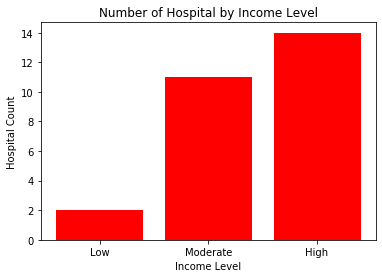

In [11]:
#creating hospital bar chart by income level
results = {
        'Low':[],
    'Moderate':[],
    'High': []
}
for i, row in zip_hsp_merge_df.iterrows():
    if int(row["Household Income"]) <= 24950:
        results["Low"].append({'Household Income':row['Household Income'], 'Hospital Name':row['Hospital Name']})
    elif int(row["Household Income"]) >= 24951 and int(row["Household Income"]) <= 41550:
        results["Moderate"].append({'Household Income':row['Household Income'], 'Hospital Name':row['Hospital Name']})
    else:
         results["High"].append({'Household Income':row['Household Income'], 'Hospital Name':row['Hospital Name']})
    
print(results['Low'])
# zip_hsp_merge_df = results
#zip_hsp_merge_df["Income Bracket"] = results
zip_hsp_merge_df['Hospital Name'].value_counts()

#hospital bar chart axis and legend
y_axis = np.arange(len(('Low', 'Moderate', 'High')))
x_axis = [len(results["Low"]),len(results["Moderate"]),len(results["High"])]
plt.bar(y_axis,x_axis, color="r", align="center")
#tick_locations = [value for value in x_axis]
plt.xticks(y_axis, ['Low','Moderate','High'])

plt.ylabel("Hospital Count")
plt.xlabel("Income Level")
plt.title("Number of Hospital by Income Level")

plt.savefig("images/HospitalsbyIncomeLevelBar.png")

In [12]:
zip_urg_merge_df = pd.merge(census,clinics_zips,left_on='Zipcode', right_on='Zipcode', how='inner')
zip_urg_merge_df.head()

,Zipcode,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,Unemployment Count,City_x,Urgent_Care,Address,City_y,Location
0,75019,39551.0,37.9,110445.0,48040.0,1624.0,4.106091,985.0,Coppell,Legacy ER & Urgent Care,330 S Denton Tap Rd,Coppell,"{'lat': 32.9621369, 'lng': -96.9930727}"
1,75040,59792.0,32.4,54664.0,20387.0,9346.0,15.630854,3054.0,Garland,CareNow Urgent Care - North Garland,5106 N President George Bush Hwy,Garland,"{'lat': 32.964361, 'lng': -96.63803809999999}"
2,75041,30684.0,30.9,40136.0,16646.0,6975.0,22.731717,1659.0,Garland,FastMed Urgent Care,1015 W Centerville Rd #100,Garland,"{'lat': 32.8588637, 'lng': -96.6463575}"
3,75043,58120.0,34.0,55149.0,24046.0,6512.0,11.204405,3233.0,Garland,Raypha Urgent Care & Clinics,3334 Broadway Blvd,Garland,"{'lat': 32.8752783, 'lng': -96.6170253}"
4,75048,20930.0,37.3,87171.0,34473.0,1081.0,5.164835,697.0,Sachse,MedPost Urgent Care of Sachse,7760 TX-78,Sachse,"{'lat': 32.990976, 'lng': -96.5714723}"


[]


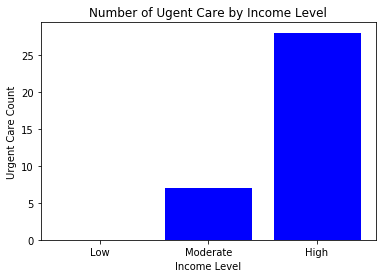

In [13]:
#creating urgent bar chart by income level
results = {
        'Low':[],
    'Moderate':[],
    'High': []
}
for i, row in zip_urg_merge_df.iterrows():
    if int(row["Household Income"]) <= 24950:
        results["Low"].append({'Household Income':row['Household Income'], 'Urgent Care':row['Urgent_Care']})
    elif int(row["Household Income"]) >= 24951 and int(row["Household Income"]) <= 41550:
        results["Moderate"].append({'Household Income':row['Household Income'], 'Urgent Care':row['Urgent_Care']})
    else:
         results["High"].append({'Household Income':row['Household Income'], 'Urgent Care':row['Urgent_Care']})
    
print(results['Low'])
# zip_hsp_merge_df = results
#zip_hsp_merge_df["Income Bracket"] = results
zip_urg_merge_df['Urgent_Care'].value_counts()

#urgent care x and y axis and legends
y_axis = np.arange(len(('Low', 'Moderate', 'High')))
x_axis = [len(results["Low"]),len(results["Moderate"]),len(results["High"])]
plt.bar(y_axis,x_axis, color="b", align="center")
#tick_locations = [value for value in x_axis]
plt.xticks(y_axis, ['Low','Moderate','High'])

plt.ylabel('Urgent Care Count')
plt.title('Number of Ugent Care by Income Level')
plt.xlabel('Income Level')

plt.savefig("images/UrgentCarebyIncomeLevelBar.png")

In [14]:
#Hospitals AND clinics

hospital_df = hospitals[hospitals['Hospital Name'] == 'hospital']
hospital_df = hospitals[["lat","lng"]]

clinics_df = clinics[clinics['Urgent_Care'] == 'clinic']
clinics_df = clinics[["Lat","Lng"]]


hospital_layer2 = gmaps.symbol_layer(
    hospital_df, fill_color='red',
    stroke_color='red', scale=3
)

clinic_layer2 = gmaps.symbol_layer(
    clinics_df, fill_color='blue',
    stroke_color='blue', scale=3
)

# Store latitude and longitude in locations
locations2 = dropped_data[["lat", "lng"]]

#create weights by poverty rate
weights = dropped_data['Poverty Rate']



# Add layer
fig = gmaps.figure()

fig.add_layer(gmaps.heatmap_layer(locations2, weights=weights, max_intensity=20))
fig.add_layer(hospital_layer2)
fig.add_layer(clinic_layer2)
# Display figure

fig


Figure(layout=FigureLayout(height='420px'))